# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [14]:
#load data and sanity check
data=pd.read_csv('GermanCredit.csv.zip')
#print(data.head())
#print(data.info())
#print(data.describe())
# Your code here! :)
data['target']=[1 if x=='Good' else 0 for x in data['Class']]
#print(data.info())
data.groupby('target')['target'].value_counts()

target  target
0       0         300
1       1         700
Name: target, dtype: int64

Obtaining X and y and Train test split and fit a simple tree with default parametrs.

In [4]:
X=data.drop(columns=['Class','target']);
y=data['target'];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_train.shape)
#y_test.reshape(-1,1)
print(y_test.shape)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(classification_report(y_test,y_pred))

(700, 61)
(300,)
              precision    recall  f1-score   support

           0       0.48      0.44      0.46        99
           1       0.74      0.76      0.75       201

    accuracy                           0.66       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.65      0.66      0.65       300



A simple tree results in 69% accuracy which is lower than the baseline. Now trying to use the grid serahc and k fold cross validation to obtain better results.

In [5]:
#set up some parameters
parameters = {'splitter':('best', 'random') ,'max_depth':(2, 5, 10,15, 20, None), 'min_samples_split':[2, 4, 6,8,10],
             'min_samples_leaf':(1,2,4,8),'max_features':(None,'sqrt','log2'),'max_leaf_nodes':(None,5,10,20,30,40)}
dtc= GridSearchCV(DecisionTreeClassifier(), parameters,scoring='accuracy')

dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
tree_report=classification_report(y_test,y_pred,output_dict=True)
print(tree_report['accuracy'])
print(dtc.best_params_)
print(dtc.best_score_)


0.7033333333333334
{'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}
0.7457142857142858


Apparently a tree with random splitter becomes the best tree for the above daat set. This results in an accuracy of 70% which seems pretty low.

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [28]:
#! pip uninstall python-graphviz --yes
#! pip  uninstall graphviz --yes
#! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [9]:
#! pip uninstall graphviz --yes
! pip install python-graphviz --yes
! conda install -c conda-forge python-graphviz --yes
#from dtreeviz.trees import *

best_tree=DecisionTreeClassifier(criterion='gini', max_depth= 20, max_features=None, max_leaf_nodes=10, min_samples_leaf= 2, min_samples_split=4, splitter='random')
best_tree.fit(X_train,y_train)
#viz = dtreeviz(best_tree, X_train, y_train,feature_names=X_train.columns)
#viz.save("boston.svg") # suffix determines the generated image format
#viz.view()       
#! pip install --force-reinstall graphviz==0.20


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/springboard

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    cairo-1.16.0               |    h7979940_1007         1.5 MB  conda-forge
    certifi-2022.6.15

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

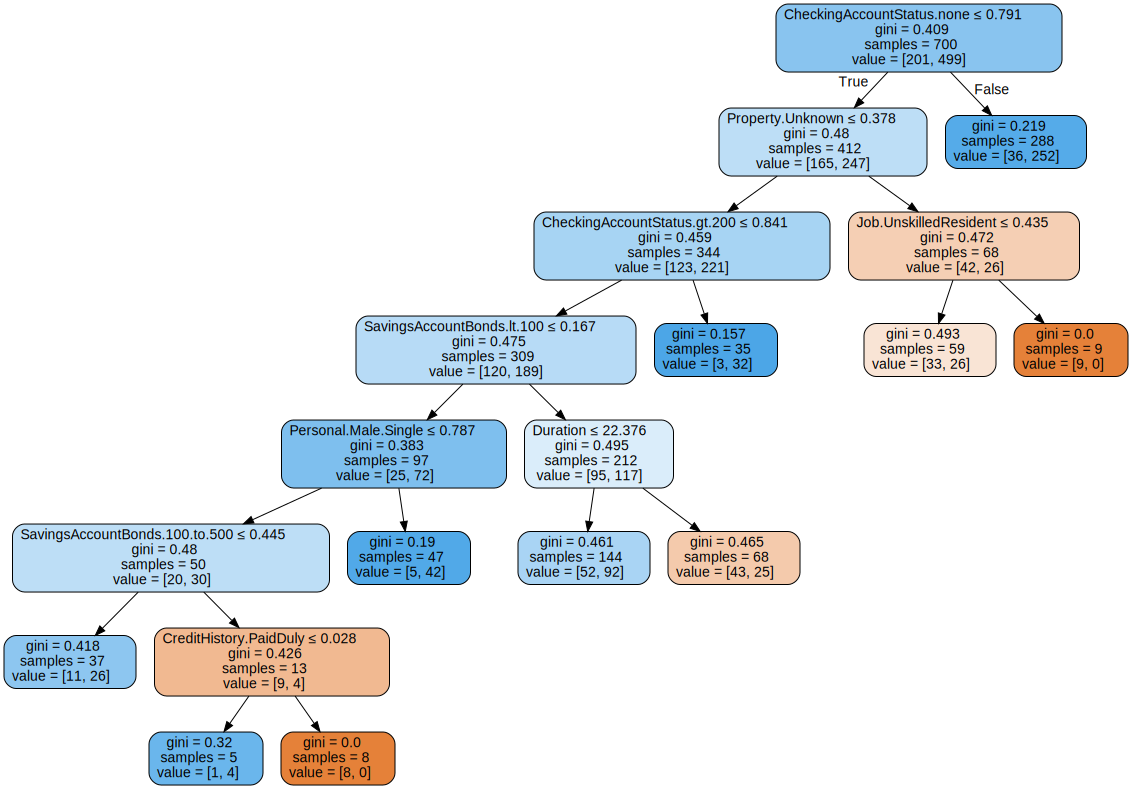

In [10]:
from sklearn import tree
import graphviz
#tree.plot_tree(best_tree)

#plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
#tree.plot_tree(best_tree, fontsize=10)
#plt.show()

dot_data = tree.export_graphviz(best_tree, out_file=None,feature_names=X_train.columns,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph 

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [15]:
from sklearn.ensemble import RandomForestClassifier

First fit a simple random forest with default parametrs

In [16]:
# Your code here! :)
rfc=RandomForestClassifier();
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.34      0.47        99
           1       0.74      0.94      0.83       201

    accuracy                           0.74       300
   macro avg       0.74      0.64      0.65       300
weighted avg       0.74      0.74      0.71       300



Now do a grid search for different parametrs


In [17]:
#set up some parameters
parameters = {'n_estimators':(20,50,100),'max_depth':(10, 20, None), 'min_samples_split':[2, 6,10],
             'min_samples_leaf':(1,2,4),'max_features':(None,'sqrt','log2'),'max_leaf_nodes':(None,10,40)}
rfc= GridSearchCV(RandomForestClassifier(), parameters,scoring='accuracy')

rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
forest_report=classification_report(y_test,y_pred,output_dict=True)
print(forest_report['accuracy'])

print(rfc.best_score_)

0.7533333333333333
0.78


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

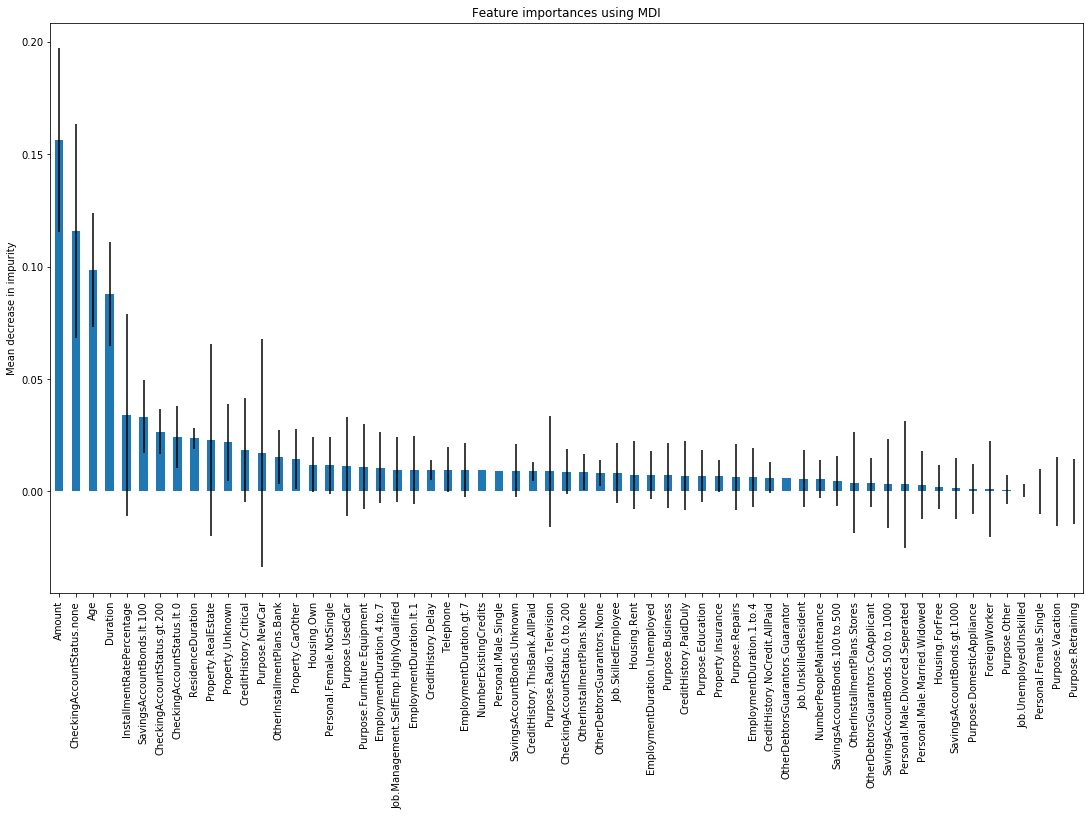

In [18]:
# Your code here
import numpy as np
from matplotlib import pyplot as plt

importances = rfc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(inplace=True,ascending=False);

#(forest_importances.head(10))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#print(importances)

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [14]:
#! pip install pdpbox

     |████████████████████████████████| 34.0 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.1 MB 22.2 MB/s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=5264c2a8326c51e4d49f6d3a2beabb909b7745d4e9effafcfcea39d389bb0f16
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=5504e72b330c4f2258a9f36e453c46e7e653d8b6403e7ee401aa5a13a1543bc0
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


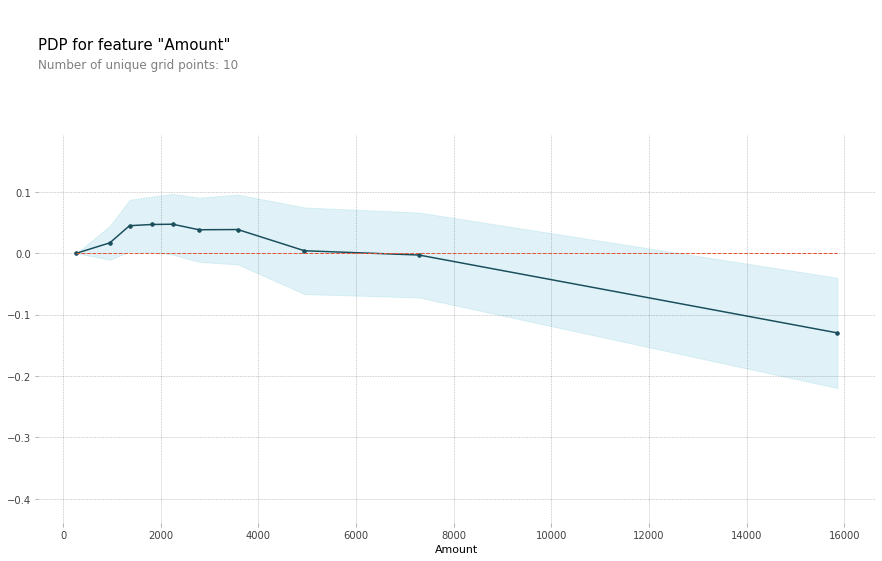

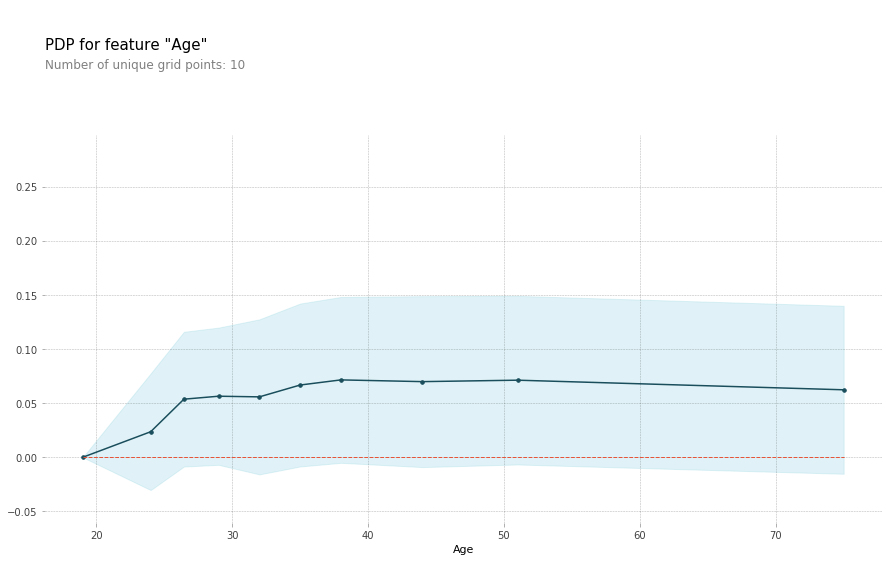

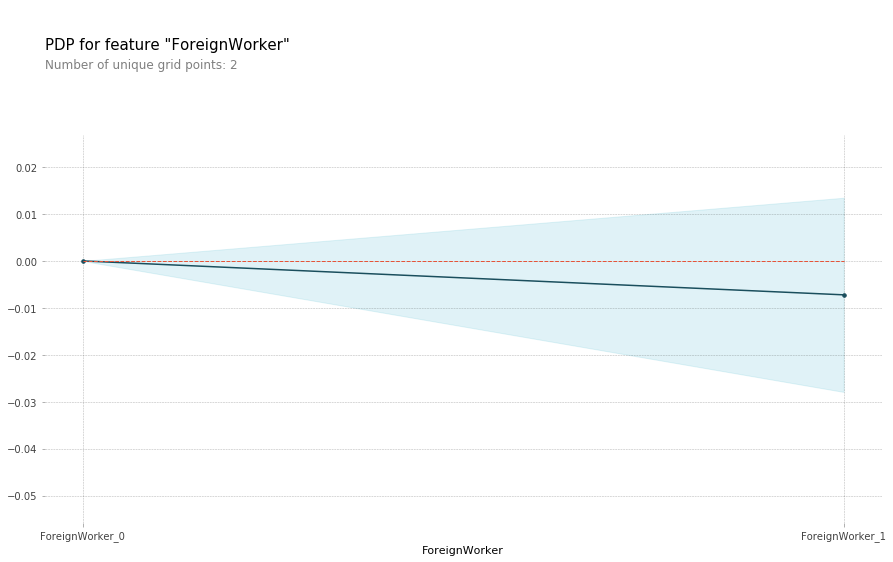

In [15]:
# Your code here!
from pdpbox import pdp

pdp_amount = pdp.pdp_isolate(model=rfc,
                          dataset=X_test,
                          model_features=X_test.columns,
                          feature='Amount')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_amount, feature_name='Amount')


pdp_age = pdp.pdp_isolate(model=rfc,
                          dataset=X_test,
                          model_features=X_test.columns,
                          feature='Age')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_age, feature_name='Age')


pdp_worker = pdp.pdp_isolate(model=rfc,
                          dataset=X_test,
                          model_features=X_test.columns,
                          feature='ForeignWorker')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_worker, feature_name='ForeignWorker')

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [20]:

#! pip install xgboost

import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)
y_pred=xgb_cl.predict(X_test)


#Now do the grid search


parameters = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.02, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8,1],
    "colsample_bytree": [0.5,1],
}

xgb_cl= GridSearchCV(xgb.XGBClassifier(), parameters,scoring='accuracy')

xgb_cl.fit(X_train,y_train)
y_pred=xgb_cl.predict(X_test)


xgb_report=classification_report(y_test,y_pred,output_dict=True)
print(xgb_report['accuracy'])
print(xgb_cl.best_score_)


0.73
0.7828571428571428


In [11]:
#! pip install catboost

from catboost import CatBoostClassifier


parameters = {'depth': [4,5,6,7],'learning_rate' : [0.008,0.009,0.01,0.02],'iterations': [100,500,1000,2000],'verbose':[False]}
    
    
    
#cb_cl= GridSearchCV(CatBoostClassifier(), parameters,scoring='accuracy')



cb_cl=CatBoostClassifier(verbose=False);

cb_cl.fit(X_train,y_train)
y_pred=cb_cl.predict(X_test)
cb_report=classification_report(y_test,y_pred,output_dict=True)
print(cb_report['accuracy'])
#print(cb_cl.best_score_)

#print(cb_cl.get_all_params())


0.75


In [12]:
#! pip install lightgbm

import lightgbm as lgb


clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
lgb_report=classification_report(y_test,y_pred,output_dict=True)
print(lgb_report['accuracy'])


0.7333333333333333


Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [21]:
reports=[tree_report,forest_report,xgb_report,cb_report,lgb_report];
names=['Tree','Forest','XGBoost','CatBoost','Light GBM'];
#print(lgb_report)
vals={'Method':[],'Accuracy':[],'F1-score':[],'Precision':[],'Recall':[]}
for i in range(len(names)):
    vals['Method'].append(names[i]);
    vals['Accuracy'].append(reports[i]['accuracy']);
    vals['F1-score'].append(reports[i]['macro avg']['f1-score']);
    vals['Precision'].append(reports[i]['macro avg']['precision']);
    vals['Recall'].append(reports[i]['macro avg']['recall']);
#print(vals)
final_result=pd.DataFrame(data=vals)
print(final_result)

      Method  Accuracy  F1-score  Precision    Recall
0       Tree  0.703333  0.638559   0.657678  0.632519
1     Forest  0.753333  0.687130   0.733173  0.674959
2    XGBoost  0.730000  0.624531   0.723422  0.621664
3   CatBoost  0.750000  0.673795   0.736241  0.662219
4  Light GBM  0.733333  0.669312   0.699793  0.660033
